In [1]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1"
)
gridmet = catalog.get_collection("gridmet")
asset = planetary_computer.sign(gridmet.assets["zarr-abfs"])
asset

<Asset href=abfs://gridmet/gridmet.zarr>

In [2]:
import fsspec
import xarray as xr

store = fsspec.get_mapper(asset.href, **asset.extra_fields["xarray:storage_options"])
ds = xr.open_zarr(store, **asset.extra_fields["xarray:open_kwargs"])
ds

<xarray.Dataset>
Dimensions:                                    (time: 15341, lat: 585,
                                                lon: 1386, crs: 1)
Coordinates:
  * crs                                        (crs) uint16 3
  * lat                                        (lat) float64 49.4 ... 25.07
  * lon                                        (lon) float64 -124.8 ... -67.06
  * time                                       (time) datetime64[ns] 1979-01-...
Data variables:
    air_temperature                            (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    burning_index_g                            (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    dead_fuel_moisture_1000hr                  (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    dead_fuel_moisture_100hr                   (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    mean_vapor_pressure_deficit                (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    potential_evapotranspiration               (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    precipitation_amount                       (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    relative_humidity                          (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    specific_humidity                          (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    surface_downwelling_shortwave_flux_in_air  (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    wind_from_direction                        (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
    wind_speed                                 (time, lat, lon) float32 dask.array<chunksize=(30, 585, 1386), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    author:                     John Abatzoglou - University of Idaho, jabatz...
    coordinate_system:          EPSG:4326
    date:                       02 July 2019
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_bounds_crs:      EPSG:4326
    ...                         ...
    geospatial_lon_units:       decimal_degrees east
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [ ]:
# import calendar
# print(calendar.isleap(1900))

In [ ]:
# # given month,year returns the dates of the first and last day of the month
# # ex: (month=12, year=2001) returns (2001-12-01, 2002-01-01)
# def string_date(month,year):
#     if month in (1,3,5,7,8,10,12):
#         return str(year)+'-'+str(month)+'-01',str(year)+'-'+str(month)+'-31'
#     if month in (4,6,9,11):
#         return str(year)+'-'+str(month)+'-01',str(year)+'-'+str(month)+'-30'
#     if calendar.isleap(year):
#         return str(year)+'-02-01',str(year)+'-02-29'
#     return str(year)+'-02-01',str(year)+'-02-28'



In [ ]:
# def str_yr_start(year):
#     return str(year)+'-01-01'
# def str_yr_end(year):
#     return str(year)+'-12-31'

In [ ]:
# def month_aridity_index(month,year,evap,prec):
#     m_prec = prec.sel(time=slice(month_start(month,year),month_end(month,year)))
#     m_evap = evap.sel(time=slice(month_start(month,year),month_end(month,year)))
    
#     total_prec = m_prec.sum(dim='time', keep_attrs = True)
#     total_evap = m_evap.sum(dim='time', keep_attrs = True)
    
#     return total_prec/total_evap

# def aridity_index(year,n,ca_shp):
#     crs = ds.attrs['coordinate_system']
#     ca_match = ca_shape.to_crs(crs)
    
#     prec = ds["precipitation_amount"].sel(time=slice(str(year-n+1)+'-01-01',str(year)+'-12-31'))
#     evap = ds["potential_evapotranspiration"].sel(time=slice(str(year-n+1)+'-01-01',str(year)+'-12-31'))
    
#     prec = prec.rio.write_crs(crs)
#     ca_prec = prec.rio.clip(ca_match.geometry, ca_match.crs)
#     evap = evap.rio.write_crs(crs)
#     ca_evap = evap.rio.clip(ca_match.geometry, ca_match.crs)
    
#     stack = month_aridity_index(1,year,evap,prec)
#     for i in range(1,13):
#         for j in range(year-n+1,year+1):
            



    
    

## SELECTING PRECIPATION DATA FOR 2020
Our goal for this example is to obtain the aridity index for 2020 as the average of the the aridity indices for every month in the year 2020. 
First we will select the precipitation data for 2020 and clip it to California.
Notice that 2020 is a leap year, that is why in the **time** dimension we see 366 units. We can further check this is the data we want by looking at the coordinates section of the info. We can see the **time** coordinate goes from 2020-01-01 to 2020-12-31.

In [3]:
prec = ds["precipitation_amount"].sel(time=slice('2020-1-01','2020-12-31'))
prec

<xarray.DataArray 'precipitation_amount' (time: 366, lat: 585, lon: 1386)>
dask.array<getitem, shape=(366, 585, 1386), dtype=float32, chunksize=(30, 585, 1386), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Attributes:
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    grid_mapping:       crs
    long_name:          pr
    standard_name:      pr
    units:              mm

## MASKING PRECIPITATION DATA TO CALIFORNIA
We will import a shapefile of CA to do this. To correctly mask the precipitation data we need to make sure the shapefile and the xarray.DataArray have the same crs. Looking at the attributes of `prec` we can see the crs is the attribute *coordinate_system*, so we can use this to transform the shapefile. For the shapefile we can simply do `shapefile_name.crs`.

In [4]:
# extract crs from xarray.DataArray
crs= ds.attrs['coordinate_system']
crs

'EPSG:4326'

epsg:3857


<AxesSubplot:>

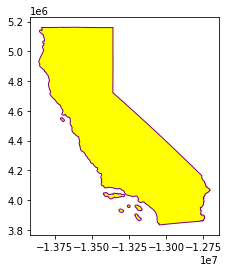

In [5]:
import geopandas as gpd

# import shapefile
ca_shape_path = "/home/jovyan/Sedgwick_Reserve/CA_geometry/CA_State_TIGER2016.shp"
ca_shape = gpd.read_file(ca_shape_path)
print(ca_shape.crs) # notice it is a different EPSG
ca_shape.plot(edgecolor='purple', color='yellow')

<AxesSubplot:>

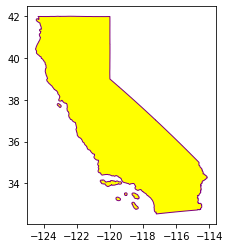

In [6]:
# match CRS
ca_match = ca_shape.to_crs(ds.attrs['coordinate_system'])
ca_match.plot(edgecolor='purple', color='yellow')

In [7]:
# clip to CA
prec = prec.rio.write_crs(crs)
ca_prec = prec.rio.clip(ca_match.geometry, ca_match.crs)
ca_prec

<xarray.DataArray 'precipitation_amount' (time: 366, lat: 227, lon: 249)>
dask.array<getitem, shape=(366, 227, 249), dtype=float32, chunksize=(30, 227, 249), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.69 32.65 32.61 32.57
  * lon      (lon) float64 -124.5 -124.4 -124.4 -124.3 ... -114.2 -114.2 -114.1
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
    crs      int64 0
Attributes:
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily Accumulated Precipitation
    dimensions:         lon lat time
    grid_mapping:       crs
    long_name:          pr
    standard_name:      pr
    units:              mm

## PREPARING EVAPOTRANSPIRATION DATA
We do the same data selection and masking for the evapotranspiration data. 

In [8]:
evap = ds["potential_evapotranspiration"].sel(time=slice('2020-1-01','2020-12-31'))
evap = evap.rio.write_crs(crs)
ca_evap = evap.rio.clip(ca_match.geometry, ca_match.crs)
ca_evap

<xarray.DataArray 'potential_evapotranspiration' (time: 366, lat: 227, lon: 249)>
dask.array<getitem, shape=(366, 227, 249), dtype=float32, chunksize=(30, 227, 249), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.69 32.65 32.61 32.57
  * lon      (lon) float64 -124.5 -124.4 -124.4 -124.3 ... -114.2 -114.2 -114.1
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
    crs      int64 0
Attributes:
    coordinate_system:  WGS84,EPSG:4326
    description:        Daily reference evapotranspiration (short grass)
    dimensions:         lon lat time
    grid_mapping:       crs
    long_name:          pet
    standard_name:      pet
    units:              mm

## COMPUTE ARIDITY INDEX FOR JANUARY
The `ca_prec` and `ca_evap` datasets both 365 layers along the time dimension. We want to compute the aridity index for each month of the year. As a first example, let's see what is the AI for January 2020.

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


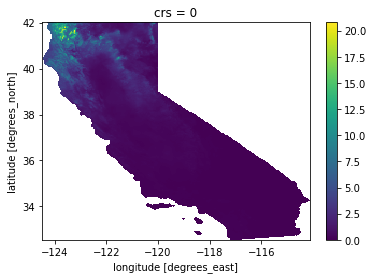

In [53]:
m_prec = ca_prec.sel(time=slice('2020-01-01','2020-01-31'))
m_evap = ca_evap.sel(time=slice('2020-01-01','2020-01-31'))

total_prec = m_prec.sum(dim='time')
total_evap = m_evap.sum(dim='time')

ai_m = total_prec/total_evap
ai_m.plot()

From the map it seems like the aridity index for january is pretty skewed towards 20, most of the map seems pretty dark, so there must be many values close to 0. Let's try some descriptive statistics to verify this. To do so we will extract the array part of the xarra.DataArray as a numpy.dataarray. 

max:  20.785297
min:  0.0


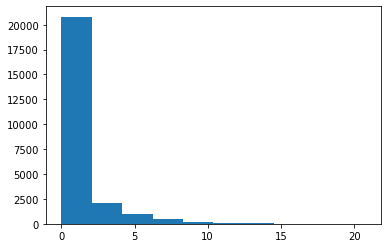

In [54]:
import numpy as np
import matplotlib.pyplot as plt

array = ai_m.to_numpy()
array = array[~np.isnan(array)]

print('max: ', np.max(array))
print('min: ', np.min(array))

freq, edges = np.histogram(array)
plt.stairs(freq, edges, fill=True)

In [13]:
def month_end(month,year):
    if month in (1,3,5,7,8,10,12):
        return str(year)+'-'+str(month)+'-31'
    if month in (4,6,9,11):
        return str(year)+'-'+str(month)+'-30'
    if calendar.isleap(year):
        return str(year)+'-2-29'
    return str(year)+'-2-28'

def month_aridity_index(month,year,evap,prec):
    m_prec = prec.sel(time=slice(str(year)+'-'+str(month)+'-01',month_end(month,year)))
    m_evap = evap.sel(time=slice(str(year)+'-'+str(month)+'-01',month_end(month,year)))
    
    total_prec = m_prec.sum(dim='time')
    total_evap = m_evap.sum(dim='time')
    
    return total_prec/total_evap

In [14]:
ai1 = month_aridity_index(1,2020,ca_evap,ca_prec)
ai1

<xarray.DataArray (lat: 227, lon: 249)>
dask.array<truediv, shape=(227, 249), dtype=float32, chunksize=(227, 249), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 41.98 41.94 41.9 41.86 ... 32.69 32.65 32.61 32.57
  * lon      (lon) float64 -124.5 -124.4 -124.4 -124.3 ... -114.2 -114.2 -114.1
    crs      int64 0

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


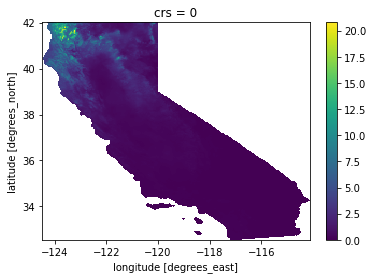

In [15]:
ai1.plot()

In [ ]:
ca_prec1 = ca_prec.sel(time=slice('2020-01-01','2020-01-31'))
#ca_prec1

In [ ]:
ca_prec3 = ca_prec.sel(time=slice('2020-03-01','2020-03-31'))
#ca_prec3

In [ ]:
t_prec1 = ca_prec1.sum(dim='time', keep_attrs = True)
t_prec1.plot()

In [ ]:
t_prec3 = ca_prec3.sum(dim='time', keep_attrs = True)
t_prec3.plot()

In [ ]:
# [first position, last position]
stack = xr.concat([t_prec1,t_prec3],dim='time',combine_attrs = 'drop')
stack

In [ ]:
stack.sel(time=0)
stack.sel(time=0).plot()

In [ ]:
stack.sel(time=1).plot()

In [ ]:
stack2 = xr.concat([stack,t_prec1],dim='time',combine_attrs = 'drop')
stack2

In [ ]:
stack2.sel(time=0).plot()

In [ ]:
stack2.sel(time=1).plot()

In [ ]:
stack2.sel(time=2).plot()

In [ ]:
#total_precip.plot()

In [ ]:
ds["potential_evapotranspiration"]

In [ ]:
evap_years= ds["potential_evapotranspiration"].sel(time=slice(str_yr_start(1979),str_yr_end(2009)))
evap_years

In [ ]:
evap_years = evap_years.rio.write_crs(crs)
ca_evap_years = evap_years.rio.clip(ca_match.geometry, ca_match.crs)
ca_evap_years

In [ ]:
total_evap = ca_evap_years.sum(dim='time', keep_attrs = True)
total_evap

In [ ]:
total_evap.plot()

In [ ]:
arid_index = total_precip/(365*total_evap)

In [ ]:
arid_index.plot()

In [ ]:
import numpy as np

# extract numpy.ndarray
arid_rgns = arid_index.to_numpy()
# establish thresholds
k = [0.05,0.65]

arid_rgns[np.where( arid_rgns< k[0])] = 1
arid_rgns[np.where( (k[0]<=arid_rgns) & (arid_rgns<k[1]))] = 2
arid_rgns[np.where(k[1]<=arid_rgns)] = 3

import matplotlib.pyplot as plt
plt.imshow(arid_rgns)

This is wrong D: 
We need to either calculate AI for each month and average all of those, or calculate it for each year and average all of those. 
https://github.com/carmengg/CA_combinatorial_ecosystems/blob/main/python_scripts/aridity/aridity_workflow.ipynb
Check the workflow there and follow either that, or the calculation of normals by the WMO. 